In [132]:
import vk  # Импортируем модуль vk
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
def get_members(groupid):  # Функция формирования базы участников сообщества в виде списка
    token = ""  # Сервисный ключ доступа - необходимо получить после регистрации приложения VK!!!
    session = vk.Session(access_token=token)  # Авторизация
    vk_api = vk.API(session)
    first = vk_api.groups.getMembers(group_id=groupid, v=5.124)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, v=5.92, offset=i*1000)["items"]
    return data


def save_data(data, filename="data.txt"):  # Функция сохранения базы в txt файле
    with open(filename, "w") as file:  # Открываем файл на запись
        # Записываем каждый id'шник в новой строке,
        # добавляя в начало "vk.com/id", а в конец перенос строки.
        for item in data:   
            file.write("vk.com/id" + str(item) + "\n") 


def enter_data(filename="data.txt"):  # Функция ввода базы из txt файла
    with open(filename) as file:  # Открываем файл на чтение
        b = [] 
        # Записываем каждую строчку файла в список,
        # убирая "vk.com/id" и "\n" с помощью среза.
        for line in file:   
            b.append(line[9:len(line) - 1])  
    return b


def get_intersection(group1, group2):  # Функция нахождения пересечений двух баз
    group1 = set(group1)  
    group2 = set(group2)  
    intersection = group1.intersection(group2)  # Находим пересечение двух множеств
    all_members = len(group1) + len(group2) - len(intersection)  
    result = len(intersection)/all_members * 100  # Высчитываем пересечение в процентах
    print('Пересечение аудиторий составило: ',round(result,7), "%.", sep="") 
    
    return str(round(result,7))+"%"
    
    #return list(intersection)


def union_members(group1, group2):  # Функция объединения двух баз без повторов
    group1 = set(group1)  
    group2 = set(group2)  
    union = group1.union(group2)  # Объединяем два множества
    return list(union) 




In [134]:
my_dict_group_members = {}

In [193]:
def main_function_get_intersection(first_page_id, second_page_id):
    if __name__ == "__main__":
        #group_lists = [first_page_id, second_page_id]
        token = ""  # Сервисный ключ доступа - необходимо получить после регистрации приложения VK!!!
        session = vk.Session(access_token=token)  # Авторизация
        vk_api = vk.API(session)
        
        # работаем с глобальной переменной - словарь членов анализируемых групп!!!
        
        global my_dict_group_members
        
        # 1-ая группа
        if first_page_id in my_dict_group_members:
            first_group_members = my_dict_group_members[first_page_id]
            
        else:
            first_group_members = get_members(first_page_id)
            my_dict_group_members[first_page_id] = set(first_group_members)
        
        # 2-ая группа
        if second_page_id in my_dict_group_members:
            second_group_members = my_dict_group_members[second_page_id]
            
        else:
            second_group_members = get_members(second_page_id)
            my_dict_group_members[second_page_id] = set(second_group_members)
                   
        
        print(f'Для {first_page_id} и {second_page_id}')
        current_intersection_percantage = get_intersection(first_group_members, 
                                                           second_group_members)
        
        return current_intersection_percantage, len(first_group_members), len(second_group_members)
        
        #union = union_members(firefly, mamay_records)
        #save_data(union)

In [136]:
def group_list_automatic_processor(rock_list):
    
    my_rock_list = rock_list

    groups_dictionary = {}
    
    group_counter = 0

    for rock_group in range(len(my_rock_list)):
        
        group_counter += 1
        print(f'Обработка группы № {group_counter}')
        
        current_head_rock_group = my_rock_list.pop()
        try:
            for current_rock_group in my_rock_list:
                curr_perc = main_function_get_intersection(current_head_rock_group, 
                                               current_rock_group)
                curr_groups_pair = current_head_rock_group+' '+current_rock_group

                if curr_groups_pair not in groups_dictionary:
                    groups_dictionary[curr_groups_pair] = curr_perc

        except IndexError:
            print('Анализ успешно завершен!')

    print('Длина списка непроверенных рок-групп составила', len(my_rock_list))
    
    return groups_dictionary

In [171]:
rock_groups_Kemerovo = {
    "7_rayon": ["sedmoy_rayon", 'hard_rock'],
    "firefly": ["fflycom", 'punk'],
    "water_please": ["waterpleaseband", 'hard_rock'],
    "in_my_hands": ["musicbandinmyhands", 'hard_rock'],
    "stanislavsky": ["stanislavskyband", 'punk'],
    "noga_neba": ["noganeba", 'russ_rock'],
    "rock_nation": ["rocknation", 'hard_rock'],
    "pandora_secret": ["pandorasecret", 'rock_cover'],
    "heal_the_pride": ["healthepride", 'postdeathcore_metal'],
    "destroyed_city": ["club_destroyed_city", 'punk'],
    "alekseevnin": ["pchblk_music", 'genre_not_determined'],
    "verbena": ["verbenamusic", 'folk'],
    "ЦветМетall": ["tzvetmet", 'hard_rock'],
    "zatmenine": ["zatmenieband", 'russ_rock'],
    "surhomme": ["surhommesmusic", 'genre_not_determined'],
    "the_old_elephants_road": ["t.o.e.r.club", 'altern_rock'],
    "vozmozhny_protivopokazaniya": ["kempunk", 'punk'],
    "birth_of_the_monolith": ["b_o_t_m", 'post_metal'],
    "южный_сектор": ["southernsector", 'russ_rock'],
    "Сибирский_Музыкальный_Ансамбль": ["bradbit", 'russ_rock'],
    "Evgeny_Ligvinenko's_Band": ["ligvinenkosband", 'altern_rock'],
    "IN_СOLD": ["in_cold_band", 'altern_rock'],
    "7_Часов": ["7chasov_official", 'russ_rock'],
    "Jahksinia": ["jahksiniamusic", 'russ_rock'],
    "selitra": ["selitra_band", 'hard_rock'],
    "THE_BEAR_IN_THE_BEAR": ["tbitbofficial", 'hardcore_electronic'],
    "Mevil_Nekrotica": ["mevilnekrotica", 'black_metal'],
    "Crucified_Dead_Flesh": ["crucifieddeadflesh", 'death_metal'],
    "GJALLARHORN": ["gjallarhornband", 'pagan_death_metal'],
    "Beyond_my_Dreams": ["beyondmydreamsoficial", 'melodic_black_metal'],
    "Кавер_гр_АЛЫЕ_ПАРУСА": ["alieparysa", 'pop_cover'],
    "Кавер_гр_MOVETON": ["moveton42", 'pop_cover'],
    "Кавер_гр_Станция_«Мир»": ["stancia_mir_band", 'pop_cover'],
    "Кавер_гр_7_ПЯТНИЦ": ["7pyatnickemerovo", 'pop_cover'],
    "Кавер_гр_В_ГЛАВНЫХ_РОЛЯХ": ["vglavroli", 'pop_cover'],
    "Кавер_гр_Коктейль_Молотова": ["cocktail_molotov", 'pop_cover'],
    "Кавер_гр_Чудо-Ягода": ["chudo_yagoda_official", 'pop_cover'],
    "Кавер_гр_МАКСИМУМ": ["maximumcoverband", 'pop_cover'],
    "Кавер_гр_JAZZ_VEGAS": ["jazzvegas42", 'pop_cover'],
    "Кавер_гр_LUNA_PARK": ["luna_park42", 'pop_cover'],
    "А-симметрия": ["a_simmetria", 'russ_rock']
}


# убрали из анализа:
#"nemnogo_nervno": ["n_nervno"],
norm_names = []
rock_list = []
for i,j in rock_groups_Kemerovo.items():
    ssylka = j[0]
    rock_list.append(ssylka)
    norm_names.append(i)
print(rock_list)

['sedmoy_rayon', 'fflycom', 'waterpleaseband', 'musicbandinmyhands', 'stanislavskyband', 'noganeba', 'rocknation', 'pandorasecret', 'healthepride', 'club_destroyed_city', 'pchblk_music', 'verbenamusic', 'tzvetmet', 'zatmenieband', 'surhommesmusic', 't.o.e.r.club', 'kempunk', 'b_o_t_m', 'southernsector', 'bradbit', 'ligvinenkosband', 'in_cold_band', '7chasov_official', 'jahksiniamusic', 'selitra_band', 'tbitbofficial', 'mevilnekrotica', 'crucifieddeadflesh', 'gjallarhornband', 'beyondmydreamsoficial', 'alieparysa', 'moveton42', 'stancia_mir_band', '7pyatnickemerovo', 'vglavroli', 'cocktail_molotov', 'chudo_yagoda_official', 'maximumcoverband', 'jazzvegas42', 'luna_park42', 'a_simmetria']


In [146]:
genre_color_list = []
for i,j in rock_groups_Kemerovo.items():
    genre = j[1]
    #print(genre)
    
    # хард-н-хэви-н-панк "корщики" - оранжевый цвет
    if (genre == 'altern_rock' or
    genre == 'hard_rock' or 
    genre == 'punk' or 
    genre == 'punk_rock'):
        genre_color_list.append('orange')
    
    # метал - красный цвет
    elif 'metal' in genre:
        genre_color_list.append('red')
        
    # русский рок, фолк - циан
    elif ('russ' in genre or
         genre == 'folk'):
        genre_color_list.append('aqua')
        
    # кавер группа - фиолетовый цвет
    elif ('cover' in genre):
        genre_color_list.append('purple')
        
    # прочие направления (жанр не определен и т.д.) - оливковый цвет
    else:
        genre_color_list.append('olive')
    
print(genre_color_list)
print(len(genre_color_list) == len(rock_list))

['orange', 'orange', 'orange', 'orange', 'orange', 'aqua', 'orange', 'purple', 'red', 'orange', 'olive', 'aqua', 'orange', 'aqua', 'olive', 'orange', 'orange', 'red', 'aqua', 'aqua', 'orange', 'orange', 'aqua', 'aqua', 'orange', 'olive', 'red', 'red', 'red', 'red', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'aqua']
True


In [139]:
len(rock_list)

41

In [140]:
main_function_get_intersection('fflycom', 'musicbandinmyhands')

Для fflycom и musicbandinmyhands
Пересечение аудиторий составило: 1.5796703%.


('1.5796703%', 356, 1123)

In [141]:
len(my_dict_group_members)

2

In [194]:
%%time

my_d = group_list_automatic_processor(rock_list)

Обработка группы № 1
Для a_simmetria и sedmoy_rayon
Пересечение аудиторий составило: 1.7405719%.
Для a_simmetria и fflycom
Пересечение аудиторий составило: 1.3333333%.
Для a_simmetria и waterpleaseband
Пересечение аудиторий составило: 4.7330097%.
Для a_simmetria и musicbandinmyhands
Пересечение аудиторий составило: 3.1496063%.
Для a_simmetria и stanislavskyband
Пересечение аудиторий составило: 1.9319938%.
Для a_simmetria и noganeba
Пересечение аудиторий составило: 3.5137318%.
Для a_simmetria и rocknation
Пересечение аудиторий составило: 4.8753666%.
Для a_simmetria и pandorasecret
Пересечение аудиторий составило: 2.519832%.
Для a_simmetria и healthepride
Пересечение аудиторий составило: 3.648458%.
Для a_simmetria и club_destroyed_city
Пересечение аудиторий составило: 6.6686338%.
Для a_simmetria и pchblk_music
Пересечение аудиторий составило: 0.2238138%.
Для a_simmetria и verbenamusic
Пересечение аудиторий составило: 2.1627566%.
Для a_simmetria и tzvetmet
Пересечение аудиторий составило:

Для moveton42 и crucifieddeadflesh
Пересечение аудиторий составило: 0.7853403%.
Для moveton42 и gjallarhornband
Пересечение аудиторий составило: 0.148368%.
Для moveton42 и beyondmydreamsoficial
Пересечение аудиторий составило: 1.1862396%.
Для moveton42 и alieparysa
Пересечение аудиторий составило: 4.9375372%.
Обработка группы № 11
Для alieparysa и sedmoy_rayon
Пересечение аудиторий составило: 0.7623008%.
Для alieparysa и fflycom
Пересечение аудиторий составило: 0.3328895%.
Для alieparysa и waterpleaseband
Пересечение аудиторий составило: 1.0721649%.
Для alieparysa и musicbandinmyhands
Пересечение аудиторий составило: 0.7978723%.
Для alieparysa и stanislavskyband
Пересечение аудиторий составило: 0.3678725%.
Для alieparysa и noganeba
Пересечение аудиторий составило: 2.4262295%.
Для alieparysa и rocknation
Пересечение аудиторий составило: 1.3623978%.
Для alieparysa и pandorasecret
Пересечение аудиторий составило: 0.8417508%.
Для alieparysa и healthepride
Пересечение аудиторий составило: 0

Пересечение аудиторий составило: 2.3849607%.
Для t.o.e.r.club и healthepride
Пересечение аудиторий составило: 4.0752351%.
Для t.o.e.r.club и club_destroyed_city
Пересечение аудиторий составило: 3.5575049%.
Для t.o.e.r.club и pchblk_music
Пересечение аудиторий составило: 0.4021448%.
Для t.o.e.r.club и verbenamusic
Пересечение аудиторий составило: 1.486698%.
Для t.o.e.r.club и tzvetmet
Пересечение аудиторий составило: 0.8298755%.
Для t.o.e.r.club и zatmenieband
Пересечение аудиторий составило: 2.376293%.
Для t.o.e.r.club и surhommesmusic
Пересечение аудиторий составило: 4.1931385%.
Обработка группы № 27
Для surhommesmusic и sedmoy_rayon
Пересечение аудиторий составило: 0.6550218%.
Для surhommesmusic и fflycom
Пересечение аудиторий составило: 0.9823183%.
Для surhommesmusic и waterpleaseband
Пересечение аудиторий составило: 3.9201711%.
Для surhommesmusic и musicbandinmyhands
Пересечение аудиторий составило: 1.5860428%.
Для surhommesmusic и stanislavskyband
Пересечение аудиторий составило: 

In [158]:
my_d = sorted(my_d.items(), key=lambda x: x[1], reverse=True)

In [159]:
current_rock_groups_list = my_d

In [160]:
my_d[0][0]

't.o.e.r.club waterpleaseband'

In [161]:
my_d[0][1][0]

'8.3379348%'

In [147]:
df = pd.DataFrame({
    'Название_группы': rock_list,
    'Страница_ВК': rock_list,
    'Размеры_группы_ВК(исходн.)': sizes,
    'Размеры_группы_ВК(преобразованные)': sizes_new
})

In [162]:
df

,Название_группы,Страница_ВК,Размеры_группы_ВК(исходн.),Размеры_группы_ВК(преобразованные)
0,sedmoy_rayon,sedmoy_rayon,303,30
1,fflycom,fflycom,356,35
2,waterpleaseband,waterpleaseband,1300,130
3,musicbandinmyhands,musicbandinmyhands,1123,112
4,stanislavskyband,stanislavskyband,486,48
5,noganeba,noganeba,411,41
6,rocknation,rocknation,709,70
7,pandorasecret,pandorasecret,6636,663
8,healthepride,healthepride,2990,299
9,club_destroyed_city,club_destroyed_city,1463,146


In [ ]:
# строим новый граф на основании таблички!

In [163]:
H = nx.Graph()
nodes_h = list(df.Страница_ВК)
#nodes_h

In [164]:
H.add_nodes_from(nodes_h)

In [165]:
sizes_h = ['']*len(nodes_h)

for group in current_rock_groups_list:
    
    audit_intersection = group[1][0].replace('%','')
    
    print(group[0])
    
    # Названия групп
    first_group = group[0].split()[0]
    second_group = group[0].split()[1]

    # % пересечения аудиторий в группах

    audit_intersection = float(audit_intersection)
    print(audit_intersection)

        # создаем новое ребро графа
    H.add_edge(first_group, second_group, weight=audit_intersection)
    
    for ind in range(len(nodes_h)):
        if nodes_h[ind] == first_group:
            print(f'Первая группа (текущ.) - {first_group}')
            print(f'Группа в "rock_list" - {nodes_h[ind]}')
            sizes_h[ind] = group[1][1]
            print(f'Размер сопоставленной группы составил {sizes_h[ind]}')

t.o.e.r.club waterpleaseband
8.3379348
Первая группа (текущ.) - t.o.e.r.club
Группа в "rock_list" - t.o.e.r.club
Размер сопоставленной группы составил 662
kempunk club_destroyed_city
8.0363636
Первая группа (текущ.) - kempunk
Группа в "rock_list" - kempunk
Размер сопоставленной группы составил 1508
luna_park42 cocktail_molotov
7.6829639
Первая группа (текущ.) - luna_park42
Группа в "rock_list" - luna_park42
Размер сопоставленной группы составил 1024
tbitbofficial healthepride
7.5450019
Первая группа (текущ.) - tbitbofficial
Группа в "rock_list" - tbitbofficial
Размер сопоставленной группы составил 2626
ligvinenkosband kempunk
7.0762479
Первая группа (текущ.) - ligvinenkosband
Группа в "rock_list" - ligvinenkosband
Размер сопоставленной группы составил 444
jazzvegas42 cocktail_molotov
6.7412423
Первая группа (текущ.) - jazzvegas42
Группа в "rock_list" - jazzvegas42
Размер сопоставленной группы составил 1104
a_simmetria club_destroyed_city
6.6686338
Первая группа (текущ.) - a_simmetria
Г

Группа в "rock_list" - stancia_mir_band
Размер сопоставленной группы составил 436
cocktail_molotov beyondmydreamsoficial
0.8029197
Первая группа (текущ.) - cocktail_molotov
Группа в "rock_list" - cocktail_molotov
Размер сопоставленной группы составил 2522
stancia_mir_band 7chasov_official
0.8025682
Первая группа (текущ.) - stancia_mir_band
Группа в "rock_list" - stancia_mir_band
Размер сопоставленной группы составил 436
alieparysa musicbandinmyhands
0.7978723
Первая группа (текущ.) - alieparysa
Группа в "rock_list" - alieparysa
Размер сопоставленной группы составил 1151
luna_park42 beyondmydreamsoficial
0.7974482
Первая группа (текущ.) - luna_park42
Группа в "rock_list" - luna_park42
Размер сопоставленной группы составил 1024
stancia_mir_band bradbit
0.7952286
Первая группа (текущ.) - stancia_mir_band
Группа в "rock_list" - stancia_mir_band
Размер сопоставленной группы составил 436
jahksiniamusic southernsector
0.7915567
Первая группа (текущ.) - jahksiniamusic
Группа в "rock_list" - ja

In [166]:
sizes_h[0] = 303

In [167]:
sizes_new_h = [int(i/10) for i in sizes_h]

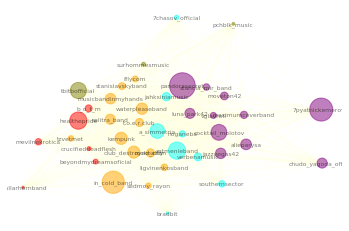

In [241]:
pos = nx.spring_layout(H, seed=1000)

plt.axis('off')

nx.draw(H, pos,node_color=genre_color_list,edge_color='lightyellow',
        alpha =0.5,
        width=0.5,edge_cmap=plt.cm.Blues,with_labels=True, 
        font_size=6, node_size=sizes_new)

#plt.show()
plt.savefig("other_graph.png", dpi=500, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1)

In [196]:
%matplotlib inline
import networkx
import requests
import json

def getVKMembers(group_id, count=1000, offset=0):
    #http://vk.com/dev/groups.getMembers
    host = 'http://api.vk.com/method'
    if count > 1000:
        raise Exception('Bad params: max of count = 1000')
    response = requests.get('{host}/groups.getMembers?group_id={group_id}&count={count}&offset={offset}'
                            .format(host=host, group_id=group_id, count=count, offset=offset))
    if not response.ok:
        raise Exception('Bad response code')
    return response.json()

def allCountOffset(func, func_id):
    set_members_id = set()
    count_members = -1
    offset = 0
    while count_members != len(set_members_id): # posible endless loop for real vk api
        response = func(func_id, offset=offset)['response']
        if count_members != response['count']:
            count_members = response['count']
        new_members_id = response['users']
        offset += len(new_members_id)
        if set_members_id | set(new_members_id) == set_members_id != set(): # without new members
            print ('WARNING: break loop', count_members, len(set_members_id))
            break
        set_members_id = set_members_id.union(new_members_id)

    return set_members_id

#groups = rock_list[:]



#members = {}
#for g in groups:
#    name = g.split('http://vk.com/')[1]
#    print (name)
#    members[name] = allCountOffset(getVKMembers, name)
    
#matrix = {}

members = my_dict_group_members

for i in members:
    for j in set(members):
        if i != j:
            matrix[i+j] = len(members[i] & members[j]) * 1.0/ min(len(members[i]), len(members[j]))

max_matrix = max(matrix.values())
min_matrix = min(matrix.values())

for i in matrix:
    matrix[i] = (matrix[i] - min_matrix) / (max_matrix - min_matrix)
    
g = networkx.Graph(directed=False)
for i in members:
    for j in members:
        if i != j:
            g.add_edge(i, j, weight=matrix[i+j])
            
members_count = {x:len(members[x]) for x in members}

max_value = max(members_count.values()) * 1.0
size = []
max_size = 900
min_size = 100
for node in g.nodes():
    size.append(((members_count[node]/max_value)*max_size + min_size)*10)
    
import matplotlib.pyplot as plt
pos=networkx.spring_layout(g)
plt.figure(figsize=(20,20))
networkx.draw_networkx(g, pos, node_size=size, width=0.5, font_size=8)
plt.axis('off')
plt.show()

TypeError: unsupported operand type(s) for &: 'list' and 'list'

In [192]:
my_dict_group_members

{'fflycom': [100865,
  322527,
  1606433,
  2306923,
  2676315,
  2712481,
  2761689,
  3838070,
  4107933,
  5388507,
  5883159,
  5918981,
  5924940,
  6861904,
  6913703,
  6936706,
  7108921,
  7316225,
  7772322,
  7921738,
  8642514,
  8665854,
  9339279,
  9641631,
  10254905,
  10313468,
  10370322,
  10748022,
  11836538,
  12024090,
  12090576,
  12194282,
  12214164,
  12218516,
  12559906,
  13723897,
  14445863,
  14766331,
  15637306,
  15964156,
  16315665,
  16339923,
  17822619,
  18225285,
  18509354,
  18866400,
  19690875,
  20618535,
  20632838,
  20814415,
  21616463,
  22567247,
  22761509,
  22872341,
  23768032,
  24849652,
  25017790,
  25192364,
  25638909,
  26285278,
  27511250,
  28931726,
  29037547,
  30862053,
  31071606,
  31973100,
  33417364,
  34228423,
  37078147,
  37171538,
  37408665,
  38968103,
  41623457,
  42603098,
  44389245,
  46433996,
  47238730,
  49472455,
  50436169,
  50690390,
  51488717,
  52440947,
  53857632,
  54312493,
  54349

In [40]:
analyzed = []
for i in range(len(rock_list)):
        analyzed.append(rock_list.pop(i))
print(analyzed)
print(rock_list)

IndexError: pop index out of range

In [54]:
rock_groups_Kemerovo = {
    "7_rayon": ["sedmoy_rayon"],
    "firefly": ["fflycom"],
    "water_please": ["waterpleaseband"],
    "in_my_hands": ["musicbandinmyhands"],
    "stanislavsky": ["stanislavskyband"],
    "noga_neba": ["noganeba"],
    "rock_nation": ["rocknation"],
    "pandora_secret": ["pandorasecret"],
    "heal_the_pride": ["healthepride"],
    "destroyed_city": ["club_destroyed_city"],
    "alekseevnin": ["aleksejevnin"],
    "verbena": ["verbenamusic"],
    "nemnogo_nervno": ["n_nervno"],
    "zatmenine": ["zatmenieband"],
    "surhomme": ["surhommesmusic"],
    "the_old_elephants_road": ["t.o.e.r.club"],
    "vozmozhny_protivopokazaniya": ["kempunk"],
    "birth_of_the_monolith": ["b_o_t_m"]
}

rock_list = []
for i,j in rock_groups_Kemerovo.items():
    ssylka = j[0]
    rock_list.append(ssylka)
print(rock_list)

['sedmoy_rayon', 'fflycom', 'waterpleaseband', 'musicbandinmyhands', 'stanislavskyband', 'noganeba', 'rocknation', 'pandorasecret', 'healthepride', 'club_destroyed_city', 'aleksejevnin', 'verbenamusic', 'n_nervno', 'zatmenieband', 'surhommesmusic', 't.o.e.r.club', 'kempunk', 'b_o_t_m']


In [43]:
for i in range(len(rock_list)):
    print(rock_list[i])
    rock_list.pop(i)

sedmoy_rayon
waterpleaseband
stanislavskyband
rocknation
healthepride
aleksejevnin
n_nervno
surhommesmusic
kempunk


IndexError: list index out of range

In [55]:
dlina_spiska = len(rock_list)
for i in range(dlina_spiska):
    analyzed += rock_list.pop()

In [56]:
print(rock_list)

[]


In [53]:
analyzed = []

In [60]:
analyzed

[]

In [61]:
import vk  # Импортируем модуль vk


def get_members(groupid):  # Функция формирования базы участников сообщества в виде списка
    first = vk_api.groups.getMembers(group_id=groupid, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, v=5.92, offset=i*1000)["items"]
    return data


def save_data(data, filename="data.txt"):  # Функция сохранения базы в txt файле
    with open(filename, "w") as file:  # Открываем файл на запись
        # Записываем каждый id'шник в новой строке,
        # добавляя в начало "vk.com/id", а в конец перенос строки.
        for item in data:   
            file.write("vk.com/id" + str(item) + "\n") 


def enter_data(filename="data.txt"):  # Функция ввода базы из txt файла
    with open(filename) as file:  # Открываем файл на чтение
        b = [] 
        # Записываем каждую строчку файла в список,
        # убирая "vk.com/id" и "\n" с помощью среза.
        for line in file:   
            b.append(line[9:len(line) - 1])  
    return b


def get_intersection(group1, group2):  # Функция нахождения пересечений двух баз
    group1 = set(group1)  
    group2 = set(group2)  
    intersection = group1.intersection(group2)  # Находим пересечение двух множеств
    all_members = len(group1) + len(group2) - len(intersection)  
    result = len(intersection)/all_members * 100  # Высчитываем пересечение в процентах
    print("Пересечение аудиторий: ", round(result,2), "%", sep="") 
    return list(intersection)


def union_members(group1, group2):  # Функция объединения двух баз без повторов
    group1 = set(group1)  
    group2 = set(group2)  
    union = group1.union(group2)  # Объединяем два множества
    return list(union) 


if __name__ == "__main__": 
    token = ""  # Сервисный ключ доступа - необходимо получить после регистрации приложения VK!!!
    session = vk.Session(access_token=token)  # Авторизация
    vk_api = vk.API(session)
    n_nervno = get_members("n_nervno")
    zatmenieband = get_members("zatmenieband")
    get_intersection(n_nervno, zatmenieband)
    union = union_members(n_nervno, zatmenieband)
    save_data(union)

Пересечение аудиторий: 0.18%
